# Linear Regression

**Linear Regression** is a supervised learning algorithm that can be used to model a dependant variable *y*, as a function of independant variables (or 'features'), *x* . 

It does this by creating a 'line of best fit' for the data.

With only one *x*, the formula is as simple as the slope of a line:

$\hat{y} = mx + b$

Like with other statistical tests, you can evaluate whether or not a simple linear regression model is statistically significant using p-values.

In addition to questions of statistical significance, we can also measure regression model performance in terms of goodness of fit and error.


## What needs to be true for Linear Regression Models to be a good choice?

### **Key Assumptions**

#### **Linearity:**

The relationship between the dependent and independent variables should be linear.  
**One of the ways to test this is a Visual Inspection:** 

- Create scatter plots of the residuals against the predicted values.   
- If the points appear to follow a straight line, the assumption of linearity is likely met.

  **Statistical Tests:**   
- We can also use the Breusch-Pagan test or the Koenker-Bassett test to formally test for linearity.


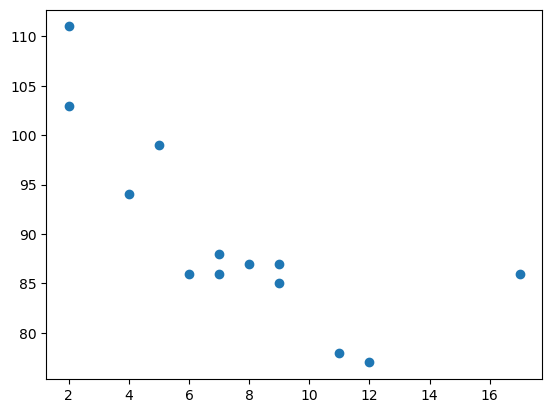

In [1]:
import matplotlib.pyplot as plt

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.show() 

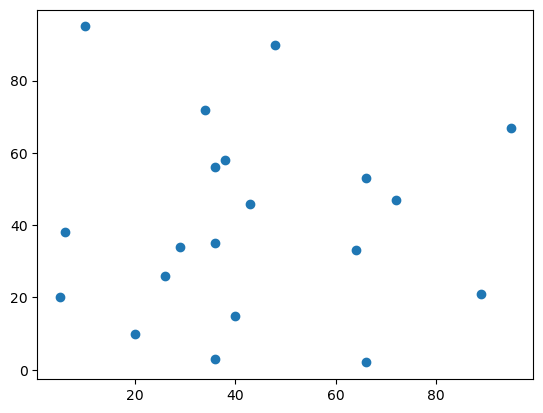

In [2]:
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

plt.scatter(x, y)
plt.show() 

## Which of these shows a linear relationship between our *x* and *y*? 

#### **Independence:**

The observations should be independent of each other.

**Time Series Data:** 

- If your data is time-series, ensure that there is no autocorrelation in the residuals.   
- Use the Durbin-Watson test or the Ljung-Box test.   
  **Cross-Sectional Data:**   
- Verify that observations are independent.   
- If there are known dependencies, consider adjusting your model or analysis.

#### **Homoscedasticity:**

Homoscedasticity: The variance of the residuals (errors) should be constant across all levels of the independent variable.   

* Can only be checked after you run the model.   

  **Visual Inspection:**   
- Create a plot of residuals against the predicted values.   
- If the scatter plot shows a constant spread of residuals, homoscedasticity is likely met.   
    
  **Statistical Tests:**   
- Use the Breusch-Pagan test or the White test to formally test for heteroscedasticity.

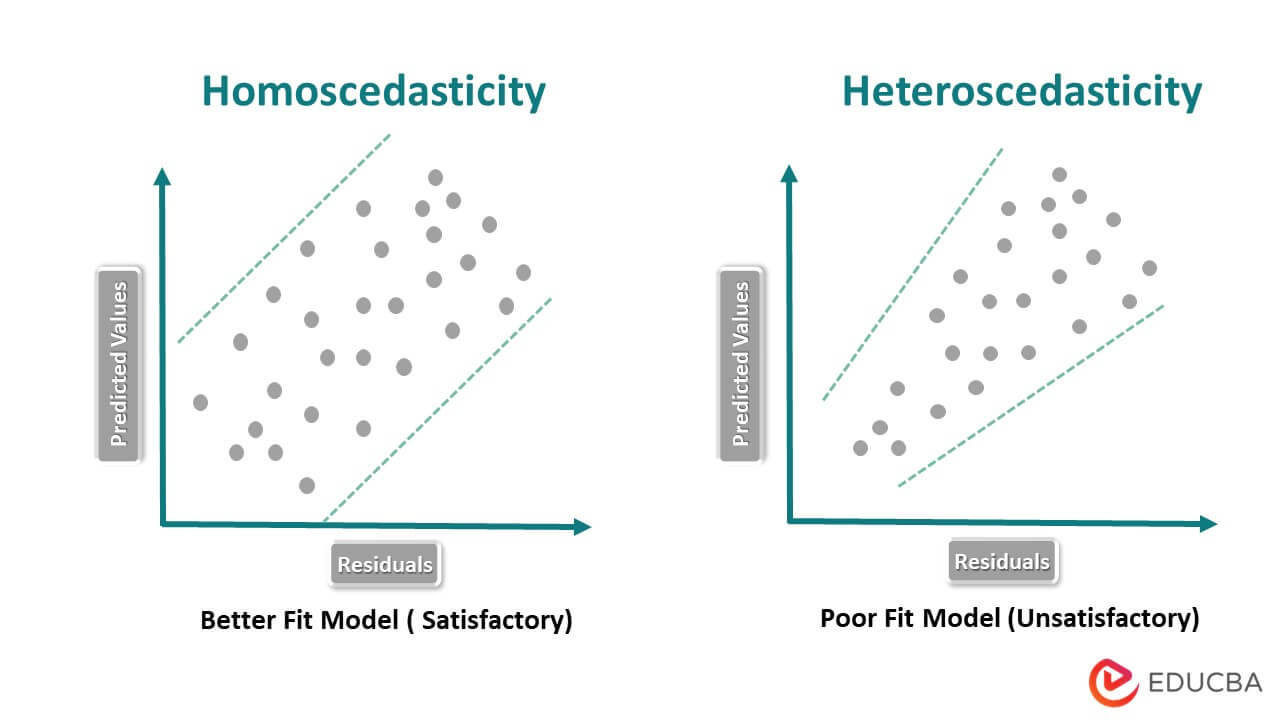


#### **Normality:**

Normality: The residuals should follow a normal distribution.  
**Q-Q Plot:** 

- Create a Q-Q plot of the residuals against a theoretical normal distribution.   
- If the points fall close to a straight line, normality is likely met.   

**Statistical Tests:**   
- Use the Shapiro-Wilk test or the Kolmogorov-Smirnov test to formally test for normality.


#### **No Multicollinearity:**

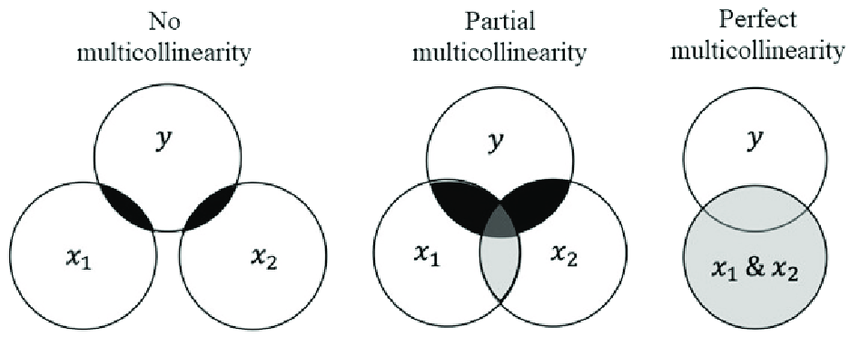

No Multicollinearity: The independent variables (features) should not be highly correlated with each other.  

**Correlation Matrix:** 

- Calculate the correlation matrix between the independent variables. If there are high correlations, multicollinearity may be present.   
- Can be checked with heat maps.   

**Variance Inflation Factor (VIF):**   
- Calculate the VIF for each independent variable. A VIF greater than 5 or 10 is often considered indicative of multicollinearity.

Looking at Correlation can inform how you select features. 

- High correlation \= likely to be impacting things\! 

Linear Regression Models are great for **inference**, but not for predictions. 

- Many times the assumptions are a little off  
- However, it is good to learn about positive/negative trends. 

When we have multiple features or *x* values that our *y* is dependant on, we can expand into **multiple linear regression.**

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x_1 + ... + \hat{\beta}_nx_n$.


## Okay. So lets actually try to make some models

In [3]:
import pandas as pd
df = pd.read_csv("data/blood_pressure.csv", index_col=0)
df

,Age,bmi,wc,hc,whr,SBP
0,31,28.76,88,101,87,128.00
1,21,27.59,86,110,78,123.33
2,23,22.45,72,104,69,90.00
3,24,28.16,89,108,82,126.67
4,20,25.05,81,108,75,120.00
...,...,...,...,...,...,...
219,21,45.15,112,132,85,157.00
220,24,37.89,96,124,77,124.67
221,37,33.24,104,108,96,126.67
222,28,35.68,103,130,79,114.67


### Identifying Features and Target

The next step is identifying which columns represent features and which column represents the target.

In this instance, we are trying to predict systolic blood pressure.

In [4]:
X = df.drop(columns='SBP')
y = df['SBP']

X

,Age,bmi,wc,hc,whr
0,31,28.76,88,101,87
1,21,27.59,86,110,78
2,23,22.45,72,104,69
3,24,28.16,89,108,82
4,20,25.05,81,108,75
...,...,...,...,...,...
219,21,45.15,112,132,85
220,24,37.89,96,124,77
221,37,33.24,104,108,96
222,28,35.68,103,130,79


### Performing Train-Test Split

In the cell below, import `train_test_split` from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

Then create variables `X_train`, `X_test`, `y_train`, and `y_test` using `train_test_split` with `X`, `y`, and `random_state=2026`.

In [5]:
from sklearn.model_selection import train_test_split

# Create train and test data using random_state=2026
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=None,
                                                    random_state=2026
)

## 2. Build and Evaluate a First Simple Model

We'll use a `LinearRegression` from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)).


In [6]:
from sklearn.linear_model import LinearRegression

# Instantiate a linear regression model
model = LinearRegression()

In [7]:
model.fit(X_train, y_train)

LinearRegression()

Then, evaluate the model using root mean squared error (RMSE). To do this, first import the `mean_squared_error` function from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)). Then pass in both the actual and predicted y values, along with `squared=False` (to get the RMSE rather than MSE).

In [10]:
from sklearn.metrics import mean_squared_error

# Generate predictions using baseline_model and X_train
y_pred_baseline = model.predict(X_train)

# Evaluate using mean_squared_error with squared=False
baseline_rmse = mean_squared_error(y_train, y_pred_baseline, squared=False)
baseline_rmse

/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(15.852332967498388)

This means that on the *training* data, our predictions are off by about 16 mmHg on average.

But what about on *unseen* data?

To stand in for true unseen data (and avoid making decisions based on this particular data split, therefore not using `X_test` or `y_test` yet), let's use cross-validation.

### Fitting and Evaluating the Model with Cross Validation

In the cell below, import `cross_val_score` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)) and call it with `baseline_model`, `X_train`, and `y_train`.

For specific implementation reasons within the scikit-learn library, you'll need to use `scoring="neg_root_mean_squared_error"`, which returns the RMSE values with their signs flipped to negative. Then we take the average and negate it at the end, so the number is directly comparable to the RMSE number above.

In [11]:
from sklearn.model_selection import cross_val_score

# Get the cross validated scores for our baseline model
baseline_cv = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error')

# Display the average of the cross-validated scores
baseline_cv_rmse = -(baseline_cv.mean())
baseline_cv_rmse

np.float64(16.14099509508709)

### Analysis of Baseline Model

So, we got an RMSE of about 16 for both the training data and the validation data. RMSE is a form of *error*, so this means the performance is somewhat better on the validation data than the training data. (This is a bit unusual — normally we expect to see better scores on the training data, but maybe there are some outliers or other reasons that this particular split has this result.)

Referring back to the chart above, both errors mean that on average we would expect to mix up someone with stage 1 vs. stage 2 hypertension, but not someone with normal blood pressure vs. critical hypertension. So it appears that the features we have might be predictive enough to be useful.

Are we overfitting? Underfitting?

---

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The RMSE values for the training data and test data are fairly close to each other and the validation score is actually slightly better than the training score, so we can assume that we are not overfitting.

It seems like our model has some room for improvement, but without further investigation it's impossible to know whether we are underfitting, or there is just irreducible error present. Maybe we are simply missing the features we would need to reduce error. (For example, we don't know anything about the diets of these study participants, and we know that diet can influence blood pressure.) But it's also possible that there is some reducible error, meaning we are currently underfitting.

In the next step, we'll assume we *are* underfitting, and will attempt to reduce that underfitting by applying some polynomial features transformations to the data.
    
</details>

## Ridge Regression, regularization, and PolynomialFeatures might improve our model.